In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def market_update( S_m , p ,delta ):
    U = np.random.rand()
    if U < p :
        S_m_new = S_m * np.exp(delta)
    else:
        S_m_new = S_m * np.exp(-delta)
    
    return S_m_new

def pool_update( S_p , S_m_new , gamma ):
    if S_m_new > gamma**-1*S_p :
      
        S_p_new =  gamma*S_m_new 
    
    elif S_m_new < gamma*S_p :
        S_p_new =  gamma**-1*S_m_new
    
    else:
        S_p_new = S_p
   
    return S_p_new

In [42]:
def pool_process( T , p , delta , gamma ):
    S_p = np.zeros(T+1)
    S_m = np.zeros(T+1)
    S_p[0]=1
    S_m[0]=1
    for i in range(T):
        S_m[i+1] = market_update( S_m[i] , p ,delta )
        S_p[i+1] = pool_update( S_p[i] , S_m[i+1] , gamma )
    return S_p , S_m

In [43]:
delta = 1
k=5
gamma = np.exp(-k*delta)
T= 1000
S_p , S_m = pool_process( T , 0.6 , delta , gamma )

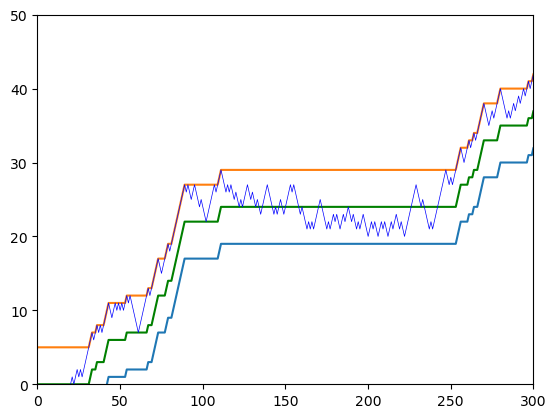

In [44]:
plt.figure()
T_array=np.arange(T+1)
plt.plot(T_array, np.log(S_p) ,'g' , label='pool')
plt.plot(T_array, np.log(gamma*S_p) , label='pool lower')
plt.plot(T_array, np.log(S_p*(gamma**-1)))
plt.plot(T_array, np.log(S_m) , 'b',linewidth=0.5)
plt.xlim(0,300)
plt.ylim(0,50)
plt.show()

In [47]:
def position(P_a,P_b,L,S_p):
    X =L * (np.sqrt(S_p) - np.sqrt(P_a) )
    Y = L * (1/np.sqrt(S_p) - 1/np.sqrt(P_b))
    if S_p > P_b :
        X = L * (np.sqrt(P_b) - np.sqrt(P_a) )
        Y = 0
    elif S_p < P_a :
        X = 0
        Y = L * (1/np.sqrt(P_a) - 1/np.sqrt(P_b))
    return X,Y

(2.4721359549995796, 0.26197165896624)

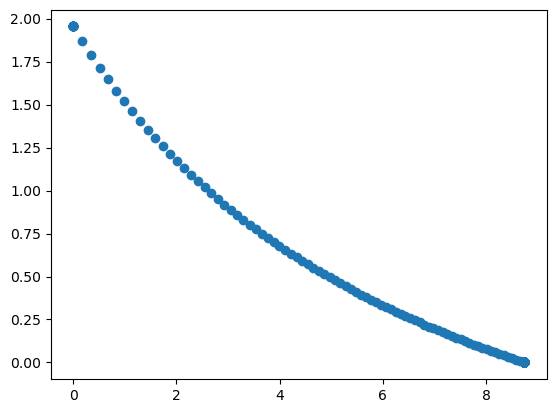

In [57]:
# An example of position curve 
X =np.array( [position(2,10,5,s/10 )[0] for s in range(1,1000)] )
Y = np.array( [position(2,10,5,s/10 )[1] for s in range(1,1000)] )
plt.scatter( X , Y )

In [58]:
def position_value(P_a,P_b,L,S_p , S_m):
    return position(P_a,P_b,L,S_p)[0]+ S_m*position(P_a,P_b,L,S_p)

In [ ]:
def fee_process( T , S_p_array , S_m_array):
    